In [55]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

from src.dataset.util import load_iterim_publications, load_publication_paths, IDGenerator
from src.features.openai_emb import log_in_to_api, generate_embeddings

In [56]:
pub = load_iterim_publications()
meta = pd.read_csv('../data/interim/publications_meta.csv')

In [57]:
docs = []

for article in tqdm(pub):
    # initialize a new id gen for each article
    id_gen = IDGenerator()
    # process abstract
    docs.append({
        'id': str(article['id']) + '_a',
        'text': article['abstract'],
        'heading': np.nan,
        'n_publication_ref': np.nan,
        'n_figure_ref': np.nan
    })
    # process body
    for section in article['sections']:
        docs.append({
            'id': str(article['id']) + '_' + str(id_gen.generate_id()),
            'text': section['heading'] + " " + section['text'],
            'heading': section['heading'].lower(),
            'n_publication_ref': section['n_publication_ref'],
            'n_figure_ref': section['n_figure_ref']
        })

100%|██████████| 154/154 [00:00<00:00, 35872.64it/s]


In [58]:
df = pd.DataFrame(docs).replace('', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2165 non-null   object 
 1   text               2130 non-null   object 
 2   heading            1922 non-null   object 
 3   n_publication_ref  2011 non-null   float64
 4   n_figure_ref       2011 non-null   float64
dtypes: float64(2), object(3)
memory usage: 84.7+ KB


### explore headings

In [5]:
df.groupby('heading')['heading'].value_counts().sort_values(ascending=False).head(20)

heading
results                   67
discussion                67
introduction              58
acknowledgements          31
method                    29
procedure                 27
participants              25
acknowledgments           24
conclusions               22
data analysis             18
methods                   17
results and discussion    10
2ss                       10
conclusion                10
article in press           9
general discussion         8
materials and methods      8
literacy tests             8
method participants        8
2os                        7
Name: count, dtype: int64

In [6]:
df.groupby('heading')['heading'].value_counts().sort_values(ascending=False).tail(20)

heading
experiment ii                                                                    1
experiment time course                                                           1
experimental conditions compared with baseline                                   1
experimental in6estigation                                                       1
experimental investigation                                                       1
experimental paradigm and procedure                                              1
experimental procedure                                                           1
experimental procedures participants                                             1
experimental task design                                                         1
experimental tasks                                                               1
experimental tests                                                               1
explicit processes in social cognition and their mechanisms                    

### get some embeddigns

In [6]:
client = log_in_to_api(secrets_path='../secrets.json')

In [43]:
abstracts = df[df['id'].str.contains('a')]
abstracts = abstracts.dropna(subset=['text'])

In [34]:
embeddings = np.array(a)

In [35]:
np.save('../data/processed/tmp_abstract_embeddings.npy', embeddings)

### analyze embs

In [59]:
abstracts = df[df['id'].str.contains('a')]
abstracts = abstracts.dropna(subset=['text'])

abstracts = abstracts.rename({'id': 'txt_id'}, axis=1)
abstracts['id'] = abstracts['txt_id'].str.split('_').str[0]
abstracts = pd.merge(abstracts, meta, left_on='id', right_on='id', how='left')

In [62]:
abstracts['year'] = abstracts['reconstructed_date'].str.split('-').str[0]
abstracts

,txt_id,text,heading,n_publication_ref,n_figure_ref,id,title,date,doi,abstract,first_section,path,reconstructed_date,year
0,p1_a,"This article may be used for research, teachin...",NaN,NaN,NaN,p1,Animated triangles: An eye tracking investigation,2008-12-10,10.1080/17470210802384214,"This article may be used for research, teachin...","{'heading': '', 'text': 'In their classic work...",data/raw/UF Papers 2007-2008 copy/Klein Zwicke...,2008-12-10,2008
1,p2_a,It is striking that in the short history of so...,NaN,NaN,NaN,p2,Implicit and explicit processes in social cogn...,2008-11-06,10.1016/j.neuron.2008.10.032,It is striking that in the short history of so...,"{'heading': 'Introduction', 'text': 'Research ...",data/raw/UF Papers 2007-2008 copy/F&F Preprint...,2008-11-06,2008
2,p3_a,La lettura è un'attività cognitiva che pervade...,NaN,NaN,NaN,p3,EFFETTI CULTURALI NELLA LETTURA IN SOGGETTI NO...,NaN,NaN,La lettura è un'attività cognitiva che pervade...,"{'heading': '', 'text': ""lare, più di 1000 com...",data/raw/UF Papers 2007-2008 copy/Italian-Chap...,2007,2007
3,p4_a,Role of land-surface changes in arctic summer ...,NaN,NaN,NaN,p4,Can autistic children predict behavior by soci...,NaN,NaN,Role of land-surface changes in arctic summer ...,"{'heading': '', 'text': 'Lawrence Hirschfeld 1...",data/raw/UF Papers 2007-2008 copy/Hirschfeld S...,2007,2007
4,p5_a,Background. We measured psychopathic traits in...,NaN,NaN,NaN,p5,Autism spectrum disorder and psychopathy : sha...,NaN,10.1017/S0033291706008853,Background. We measured psychopathic traits in...,"{'heading': 'INTRODUCTION', 'text': ""Hans Aspe...",data/raw/UF Papers 2007-2008 copy/Rogers Vidin...,2007,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,p145_a,Fast Science is bad for scientists and bad for...,NaN,NaN,NaN,p145,Fast Lane to Slow Science,NaN,10.1016/j.tics.2019.10.007,Fast Science is bad for scientists and bad for...,"{'heading': '', 'text': ""More Speed, More Hast...",data/raw/UF papers 2014 - 2021 copy/Fast Lane ...,2019,2019
115,p146_a,One contribution of 16 to a discussion meeting...,NaN,NaN,NaN,p146,NaN,NaN,10.1098/rstb.2017.0361,One contribution of 16 to a discussion meeting...,"{'heading': '', 'text': ""Depression, schizophr...",data/raw/UF papers 2014 - 2021 copy/UF Preface...,2018,2018
116,p148_a,Recent studies on mentalizing have shown that ...,NaN,NaN,NaN,p148,"F o r P e e r R e v i e w Knowing Me, Knowing ...",NaN,10.1016/0010-0277(85)90022-8,Recent studies on mentalizing have shown that ...,"{'heading': ' ', 'text': 'Goldman, 2006;\nGopn...",data/raw/UF papers 2014 - 2021 copy/Zinck et a...,2020,2020
117,p152_a,Developmental cognitive neuroscience is flouri...,NaN,NaN,NaN,p152,Developmental Cognitive Neuroscience,2019-06-01,10.1016/j.dcn.2019.100669,Developmental cognitive neuroscience is flouri...,"{'heading': 'Introduction', 'text': 'The Flux ...",data/raw/UF papers 2014 - 2021 copy/UF Flux of...,2019-06-01,2019


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
abstracts['embedding'] = embeddings.tolist()

<Axes: xlabel='year'>

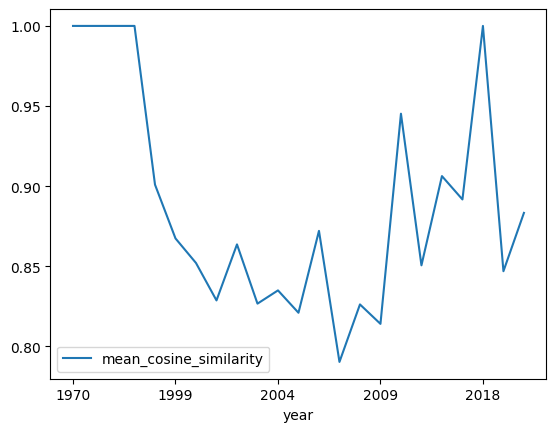

In [75]:
c_years = []
c_mcos = []
c_n_points = []
for i, group in abstracts.groupby('year'):
    yearly_embeddings = np.array(group['embedding'].tolist())
    cossims = cosine_similarity(yearly_embeddings)
    mean_cossim = np.mean(cossims)
    c_years.append(i)
    c_mcos.append(mean_cossim)
    c_n_points.append(yearly_embeddings.shape[0])

df_cossims = pd.DataFrame({'year': c_years, 'mean_cosine_similarity': c_mcos, 'n': c_n_points})
df_cossims.plot(x='year', y='mean_cosine_similarity')

<Axes: xlabel='year'>

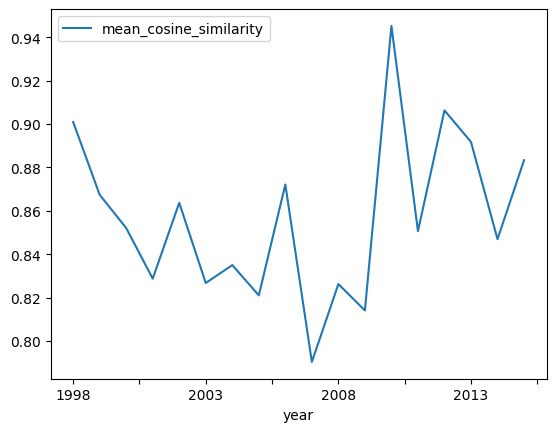

In [77]:
df_cossims.query('n > 1').plot(x='year', y='mean_cosine_similarity')